### Importación de datos



In [87]:
!git clone https://github.com/Rob770/Analisis_de_las_Tiendas.git


Cloning into 'Analisis_de_las_Tiendas'...


In [88]:
%cd Analisis_de_las_Tiendas


/content/Analisis_de_las_Tiendas/Analisis_de_las_Tiendas/Analisis_de_las_Tiendas/Analisis_de_las_Tiendas/Analisis_de_las_Tiendas/Analisis_de_las_Tiendas


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
cp -r /content/Analisis_de_las_Tiendas /content/drive/MyDrive/


In [91]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [92]:
def facturacion_total(df):
    return df["Precio"].sum()

for i, tienda in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}: ${facturacion_total(tienda):,.2f}")


Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [93]:
import matplotlib.pyplot as plt

facturaciones = [
    facturacion_total(tienda),
    facturacion_total(tienda2),
    facturacion_total(tienda3),
    facturacion_total(tienda4)
]

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]


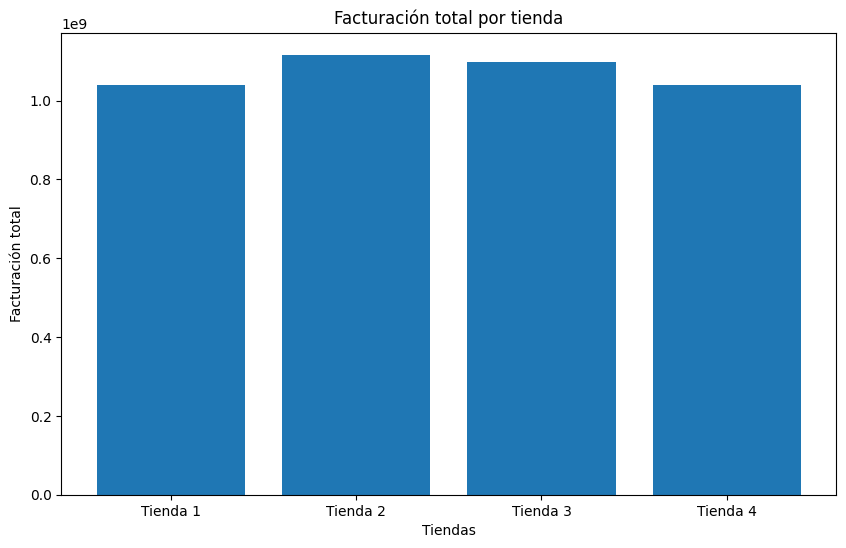

In [94]:
plt.figure(figsize=(10,6))

plt.bar(tiendas, facturaciones)

plt.title("Facturación total por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Facturación total")

plt.show()


In [95]:
tienda.columns


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [96]:
import matplotlib.pyplot as plt


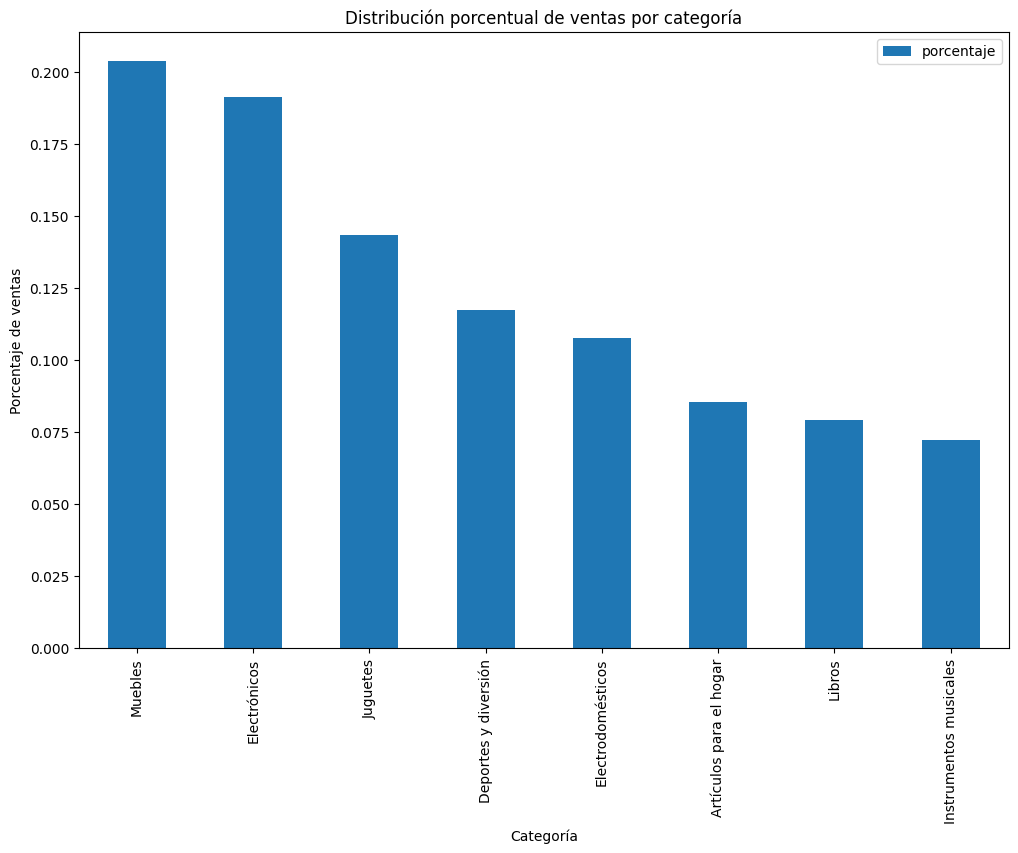

In [97]:
porcentaje_categoria = (
    tienda["Categoría del Producto"]
    .value_counts(normalize=True)
    .to_frame(name="porcentaje")
)

porcentaje_categoria.plot(
    kind="bar",
    figsize=(12,8),
    xlabel="Categoría",
    ylabel="Porcentaje de ventas",
)
plt.title("Distribución porcentual de ventas por categoría")
plt.show()


# 2. Ventas por categoría

In [98]:
ventas_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_categoria


,Precio
Categoría del Producto,
Electrónicos,409476100.0
Electrodomésticos,283260200.0
Muebles,192528900.0
Instrumentos musicales,75102400.0
Deportes y diversión,33350100.0
Juguetes,20262200.0
Artículos para el hogar,15074500.0
Libros,9321300.0


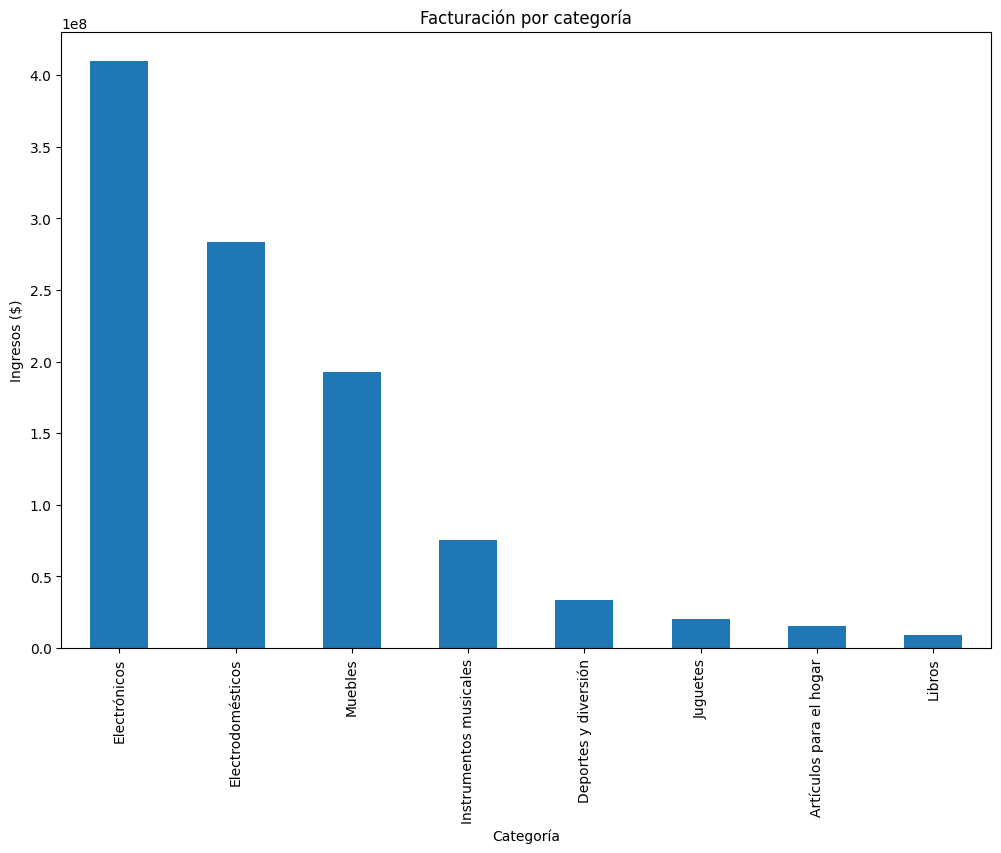

In [99]:
facturacion_categoria = (
    tienda.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

facturacion_categoria.plot(
    kind="bar",
    figsize=(12,8),
    xlabel="Categoría",
    ylabel="Ingresos ($)",
)
plt.title("Facturación por categoría")
plt.show()


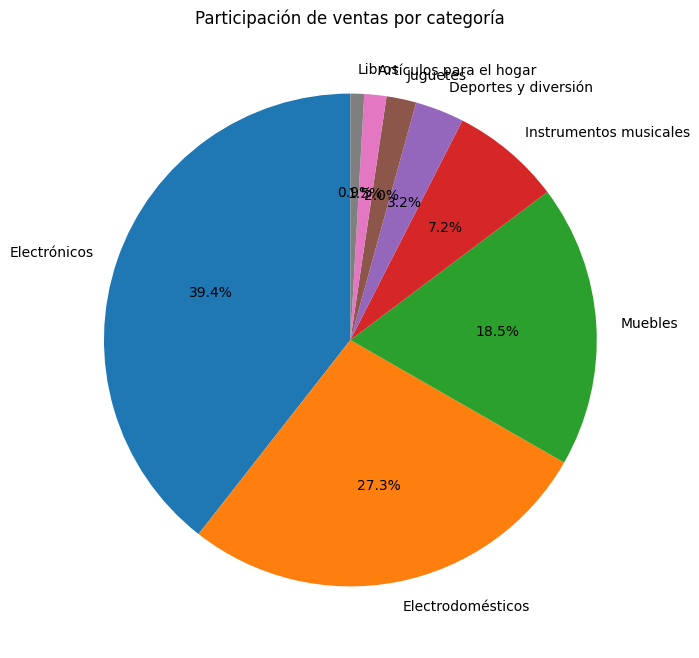

In [108]:
ventas_categoria.plot(
    kind="pie",
    figsize=(8,8),
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Participación de ventas por categoría")
plt.ylabel("")
plt.show()


# 3. Calificación promedio de la tienda


In [101]:
import pandas as pd
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda, tienda2, tienda3, tienda4])


In [102]:
calificacion_promedio = (
    df.groupby("Tienda")["Calificación"]
    .mean()
    .sort_values(ascending=False)
)

calificacion_promedio
df.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


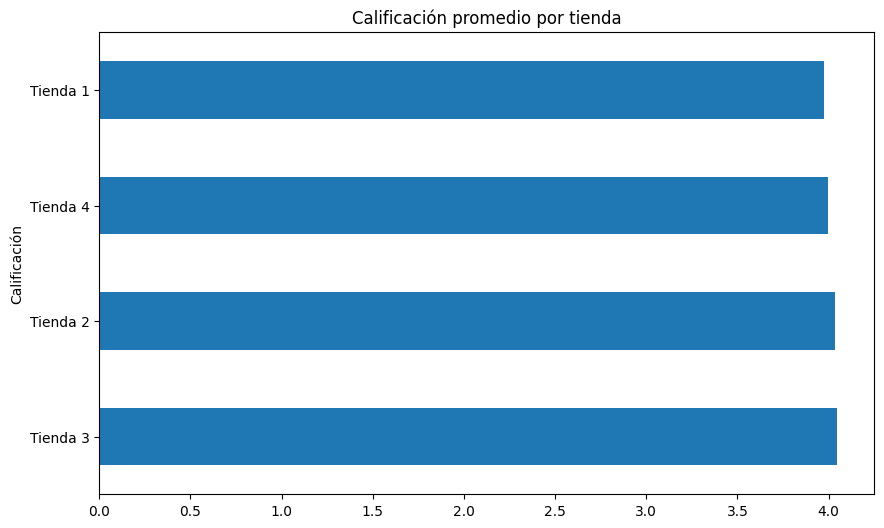

In [109]:
calificacion_promedio.plot(
    kind="barh",
    figsize=(10,6),
    title="Calificación promedio por tienda",
    ylabel="Calificación"
)
plt.show()


# 4. Productos más y menos vendidos

In [104]:
productos_vendidos = (
    df["Producto"]
    .value_counts()
)

productos_vendidos.head(5), productos_vendidos.tail(5)


(Producto
 Mesa de noche                210
 Carrito de control remoto    206
 Microondas                   206
 Batería                      203
 Cama king                    201
 Name: count, dtype: int64,
 Producto
 Ciencia de datos con Python    166
 Guitarra eléctrica             165
 Mochila                        163
 Auriculares con micrófono      158
 Celular ABXY                   157
 Name: count, dtype: int64)

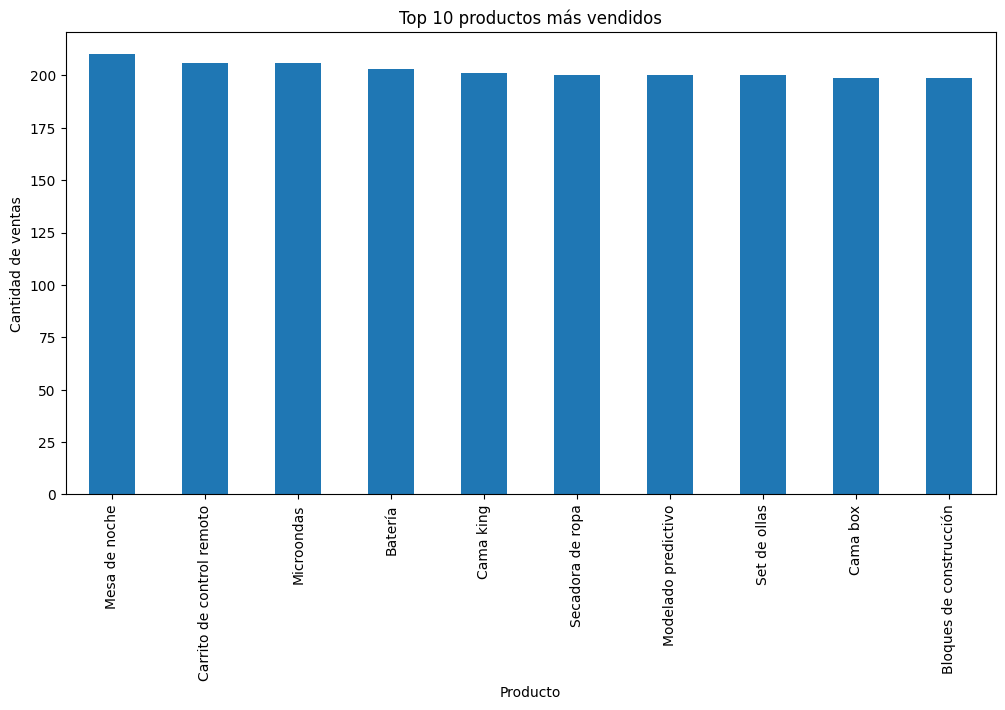

In [105]:
productos_vendidos.head(10).plot(
    kind="bar",
    figsize=(12,6),
    title="Top 10 productos más vendidos",
    ylabel="Cantidad de ventas"
)
plt.show()


# 5. Envío promedio por tienda

In [106]:
envio_promedio = (
    df.groupby("Tienda")["Costo de envío"]
    .mean()
    .sort_values()
)

envio_promedio


,Costo de envío
Tienda,
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


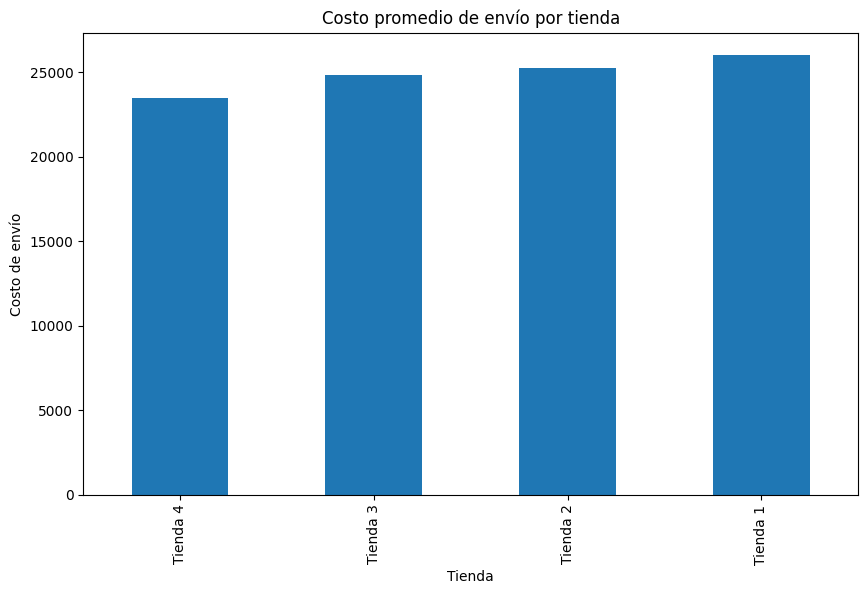

In [107]:
envio_promedio.plot(
    kind="bar",
    figsize=(10,6),
    title="Costo promedio de envío por tienda",
    ylabel="Costo de envío"
)
plt.show()


##**Analisis **

####**Al comienzo de nuestro analisi, en el cual hicimos una recopilacion de los datos de las tiendas y adentrados en estos datos exploramos indicadores que llevaron a responder la siguiente cuestionante ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.
concluimos con que la tienenda con menor facturacion segun los datos fue la tienda 4, que tambien tiene el menor promedio en calificacion indicando menor satisfaccion con los clientes, reflejando un volumen menor de las ventas y un consto promedio de envio mas alto frente a las demas tiendas **

#### En conclucion: basados en el análisis de facturación, calificación de clientes, volumen de ventas y costos de envío, se concluye que la Tienda 4 presenta el desempeño más bajo dentro de la cadena Alura Store. Por esta razón, se recomienda al Sr. Juan vender dicha tienda para iniciar su nuevo emprendimiento.